# SBA Loan Approval Analysis & Prediction

In this project, we have analysed and predicted loan approval status based on various parameters for the Small Business Administration (SBA). We use various python libraries to preprocess the dataset, and the dataset was imported from kaggle.
The initial pre-processing of the dataset was inspired from Kevin Miller. Further model training was performed into predicting the best result for the loan approval.

## Importing the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## Importing the Dataset

In [6]:
df = pd.read_csv('../SBAnational.csv')

In [7]:
df_copy = df.copy()

## Data Pre-Processing

Understanding the dataset and it's features and pre-processing it according to the required dataframe for model training purposes.

In [8]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [10]:
df.shape

(899164, 27)

Here, we notice that there are 27 different columns, and there are 899164 entries in the dataframe.

In [11]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [12]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Here, we notice that there are significant number of null values in the dataframe, specifically the most in ChgOffDate column.

In [13]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [14]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [15]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

Here, we notice that several columns which need to have a specific dtype has object, which we will need to correct by setting them with their appropriate dtype.

In [16]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


Here, we notice that the issue is because of the dollar symbol, because of which converts the int dtype column to object.

So we remove the symbol and convert the dtype of these columns.

In [17]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

Here, in case of ApprovalFY, we have two dtypes: str and int

We need to convert into int dtype, so we need to check which unique values in the column has str dtype.

In [18]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

In [19]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

So, we notice that there are some rows which have the character 'A' along with the year.

In [20]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')

In [21]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    886240
Name: ApprovalFY, dtype: int64

Further converting the columns to their appropriate dtypes.

In [22]:
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [23]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [24]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

Here, according the file that was provided along with the dataset, we map the industry code with the industry name.

In [25]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [26]:
df.dropna(subset = ['Industry'], inplace = True)

Now, we convert the FranchiseCode column to a binary column, based on if whether it is or it isn't a franchise, referring the file along with the dataset.

In [27]:
df.FranchiseCode.unique()

array([    1, 15100, 10656, ..., 16452, 35618, 18701], dtype=int64)

In [28]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [29]:
df.FranchiseCode

0         1
1         1
2         1
5         1
7         1
         ..
899156    1
899157    1
899159    1
899160    1
899161    1
Name: FranchiseCode, Length: 687973, dtype: int64

Convert the NewExist column into a binary column.

In [30]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [31]:
df.NewExist.unique()

array([2, 1], dtype=int64)

In [32]:
df.RevLineCr.unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [33]:
df.LowDoc.unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [34]:
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

In [35]:
df.RevLineCr.unique()
df.LowDoc.unique()

array([1, 0])

In [36]:
df.MIS_Status.unique()

array(['P I F', 'CHGOFF'], dtype=object)

Loan Status: Paid in Full, Charged Off

In [37]:
df.MIS_Status.value_counts()

P I F     358558
CHGOFF     98382
Name: MIS_Status, dtype: int64

In [38]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    358558
1     98382
Name: Default, dtype: int64

In [39]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [40]:
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [41]:
df.DaysToDisbursement.info()

<class 'pandas.core.series.Series'>
Int64Index: 456940 entries, 0 to 899161
Series name: DaysToDisbursement
Non-Null Count   Dtype          
--------------   -----          
456940 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 7.0 MB


In [42]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [43]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [44]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [45]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [46]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [47]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int32
LowDoc                         int32
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [48]:
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})

In [49]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int32
LowDoc                         int32
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [50]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [51]:
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [52]:
df.shape

(456940, 21)

In [53]:
df.Term.unique().sum()

70436

In [54]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

In [55]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) | 
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)


In [56]:
df.DisbursementFY.unique()

array([1999, 1997, 1998, 2006, 2001, 2002, 2000, 2004, 2003, 2005, 2009,
       2007, 2008, 1996, 2010, 1995, 2012, 2011, 1984, 1986, 2013, 1987,
       1988, 1989, 1990, 2014, 1994, 1991, 1992, 1993, 2020, 2028],
      dtype=int64)

In [57]:
df = df[df.DisbursementFY <= 2010]

In [58]:
df.shape

(438504, 23)

Analyzing the Data based on their dtypes

In [59]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,438504,438504,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504,438504.000000,438504.000000,...,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59171,55644,NaN,NaN,NaN,NaN,NaN,270482,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.665604,94.119445,9.794887,1.843611,4.568973,NaN,0.418959,0.057247,...,0.030597,0.263840,0.221918,109.090631,2002.705704,0.454094,0.654071,0.636478,0.111972,0.733934
std,NaN,NaN,5.492623,68.548785,57.674184,16.496650,15.330176,NaN,0.493389,0.232314,...,0.172224,0.440714,0.415537,182.221498,5.403909,0.497889,0.179932,0.481014,0.315332,0.441900
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829994,1.000000,0.000000,1.000000


In [60]:
df['DisbursedGreaterAppv'] = np.where(df['DisbursementGross'] > df['GrAppv'], 1, 0)

In [61]:
df.DisbursedGreaterAppv.unique()

array([0, 1])

In [62]:
df = df[df['DaysToDisbursement'] >= 0]

df.shape

(438090, 24)

In [63]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
count,438090,438090,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090,438090.000000,438090.000000,...,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59121,55628,NaN,NaN,NaN,NaN,NaN,270261,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.662987,94.113178,9.795026,1.843525,4.567514,NaN,0.419122,0.057189,...,0.263825,0.222039,109.220368,2002.703264,0.453993,0.654037,0.636351,0.111979,0.734509,0.314639
std,NaN,NaN,5.490509,68.545279,57.699074,16.503378,15.332166,NaN,0.493416,0.232204,...,0.440706,0.415618,182.165509,5.401641,0.497879,0.179937,0.481050,0.315341,0.441595,0.464372
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829500,1.000000,0.000000,1.000000,1.000000


## Data Visualization

Here, the plan is to find out the correlation among the columns, as well as find out the trends of the column, and how the dataframe behaves based on the time frame, particularly the fluctuation during the Great Recession.

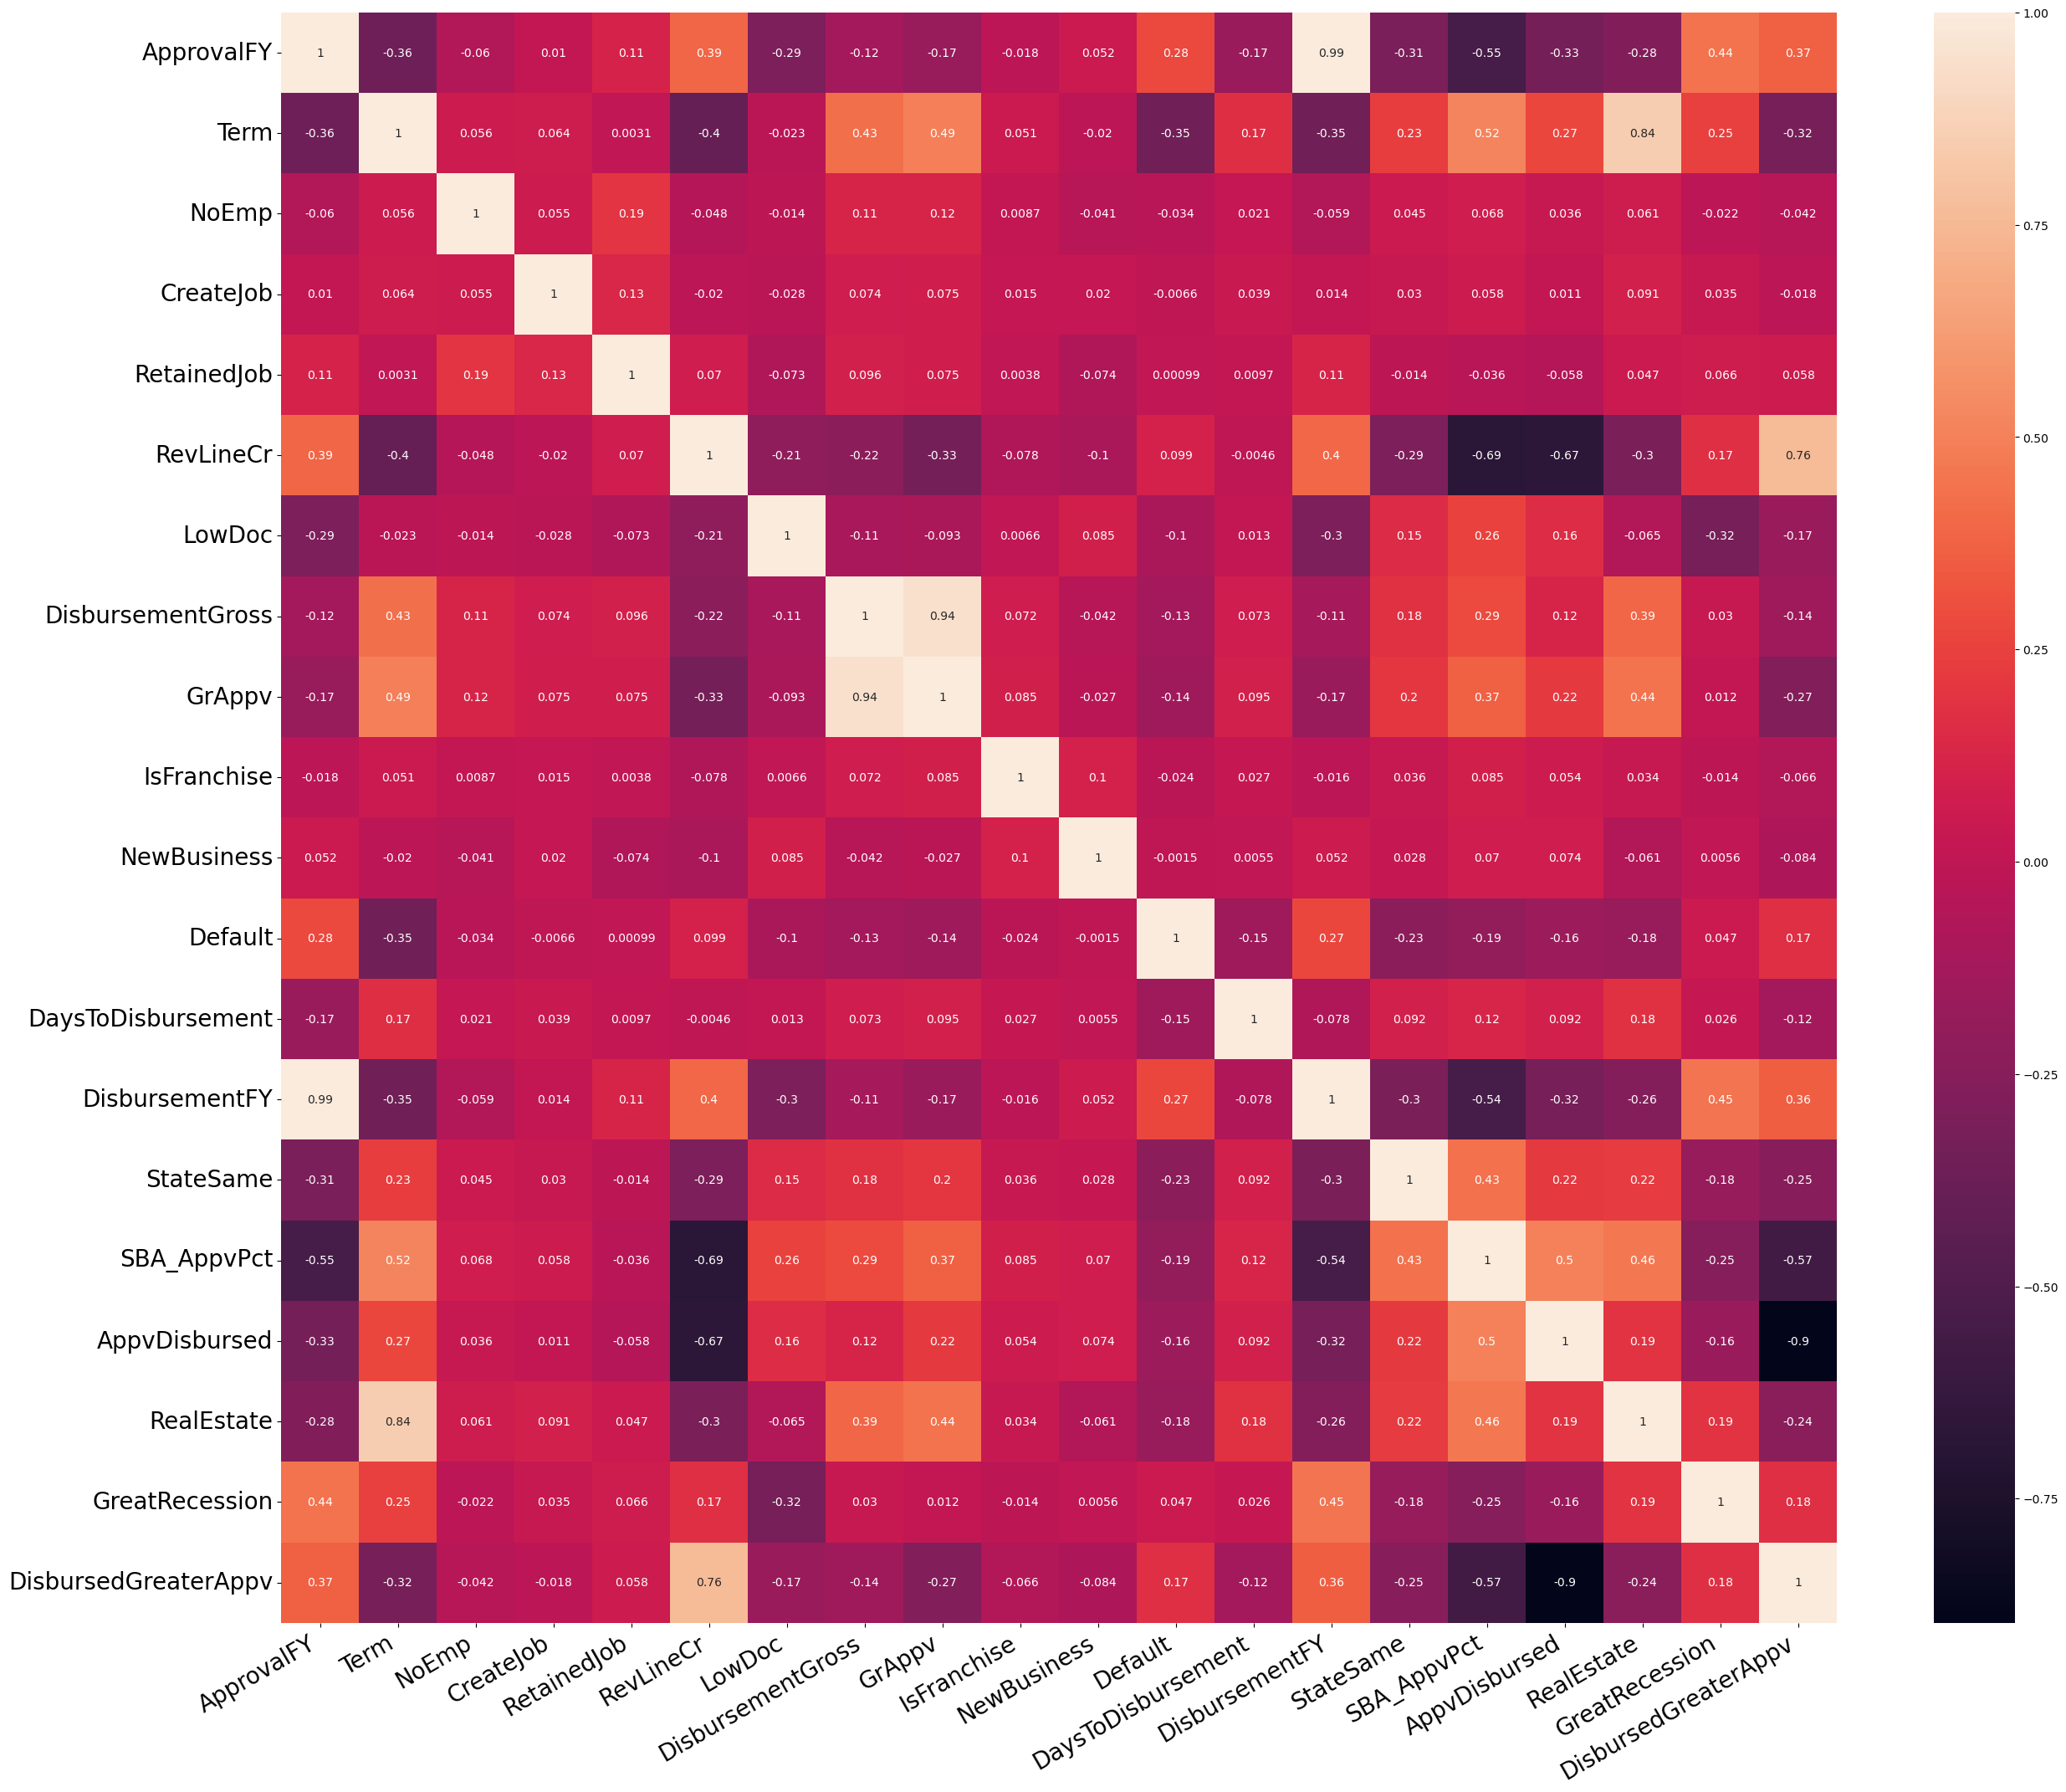

In [64]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

    GrAppv & DisbursementGross: Positive
    DisbursedGreaterAppv & AppvDisbursed: Negative
    RevLineCr & DisbursedGreaterAppv: Positive
    DisbursementFY & ApprovalFY:  Positive
    And More

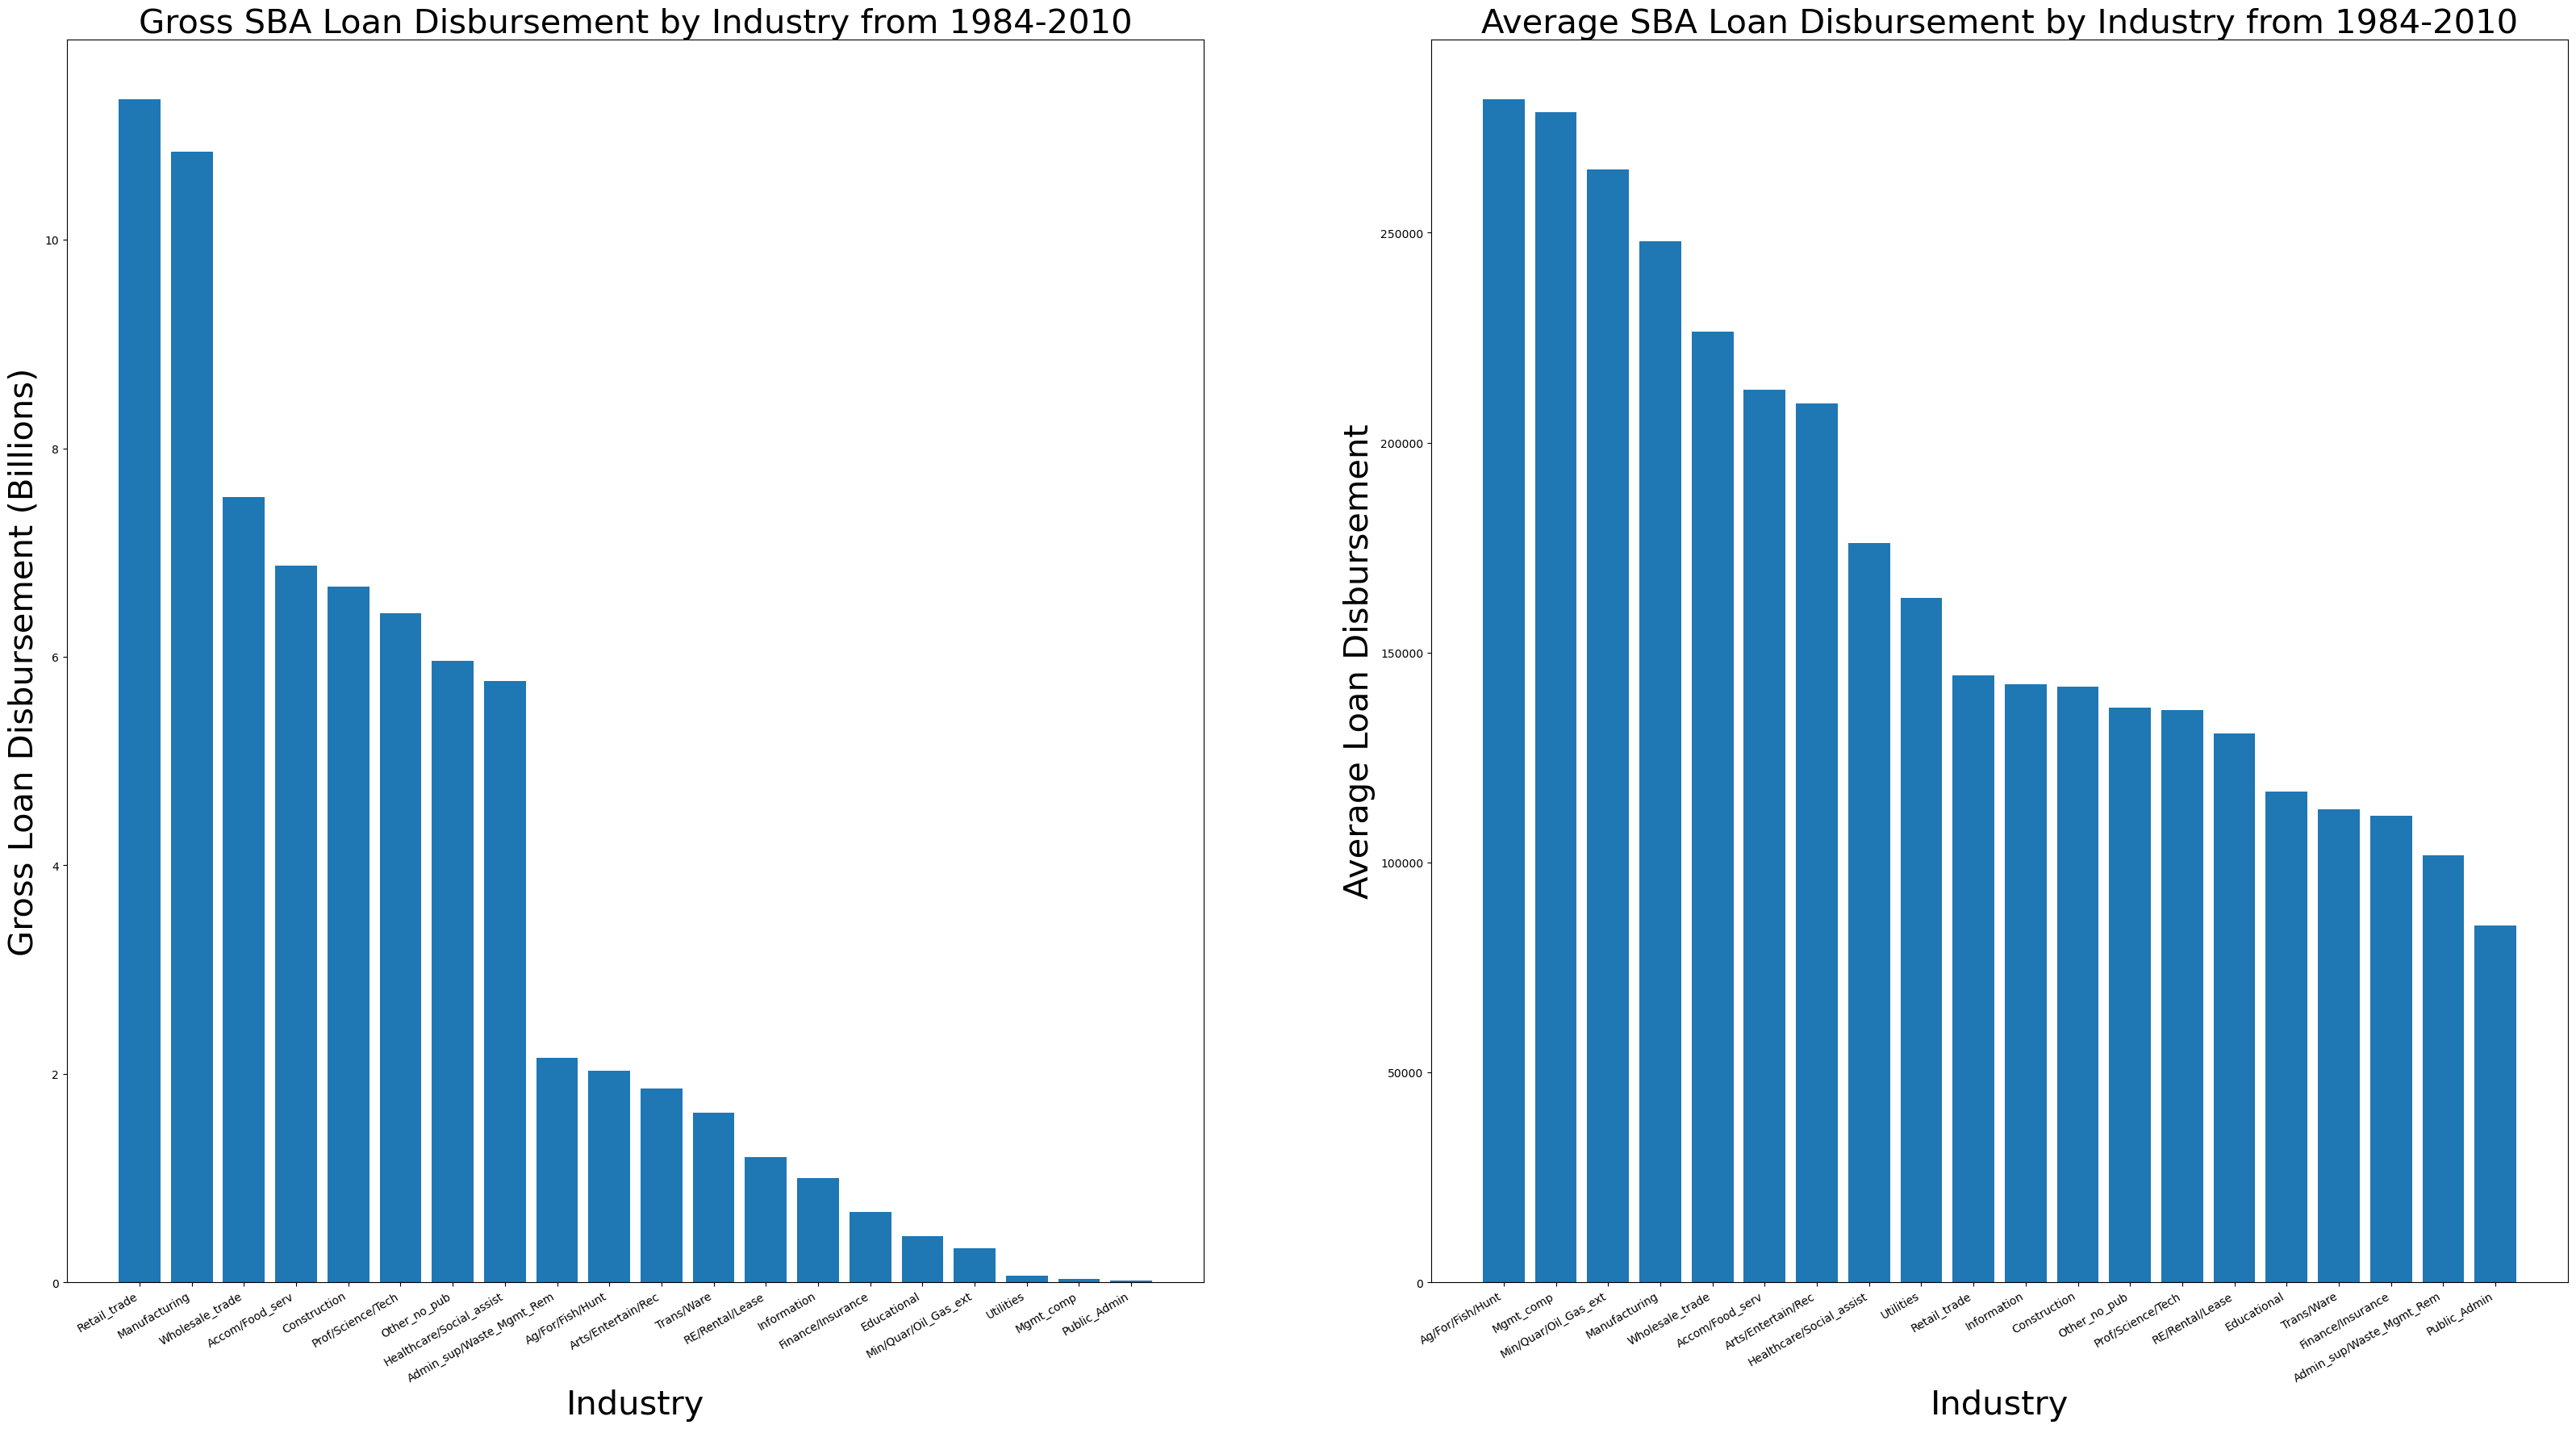

In [65]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax1.set_xlabel('Industry', fontsize = 30)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 30)

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax2.set_xlabel('Industry',  fontsize = 30)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 30)


plt.show()

We notice, that Retail Trade and Manufacturing Industries have taken more loans than any other in this time period.

But Agriculture, Forestry, Fishing, Hunting, Mining and more have small number of loans taken, but the amount of loan taken in total is the most relative to the other industries. 

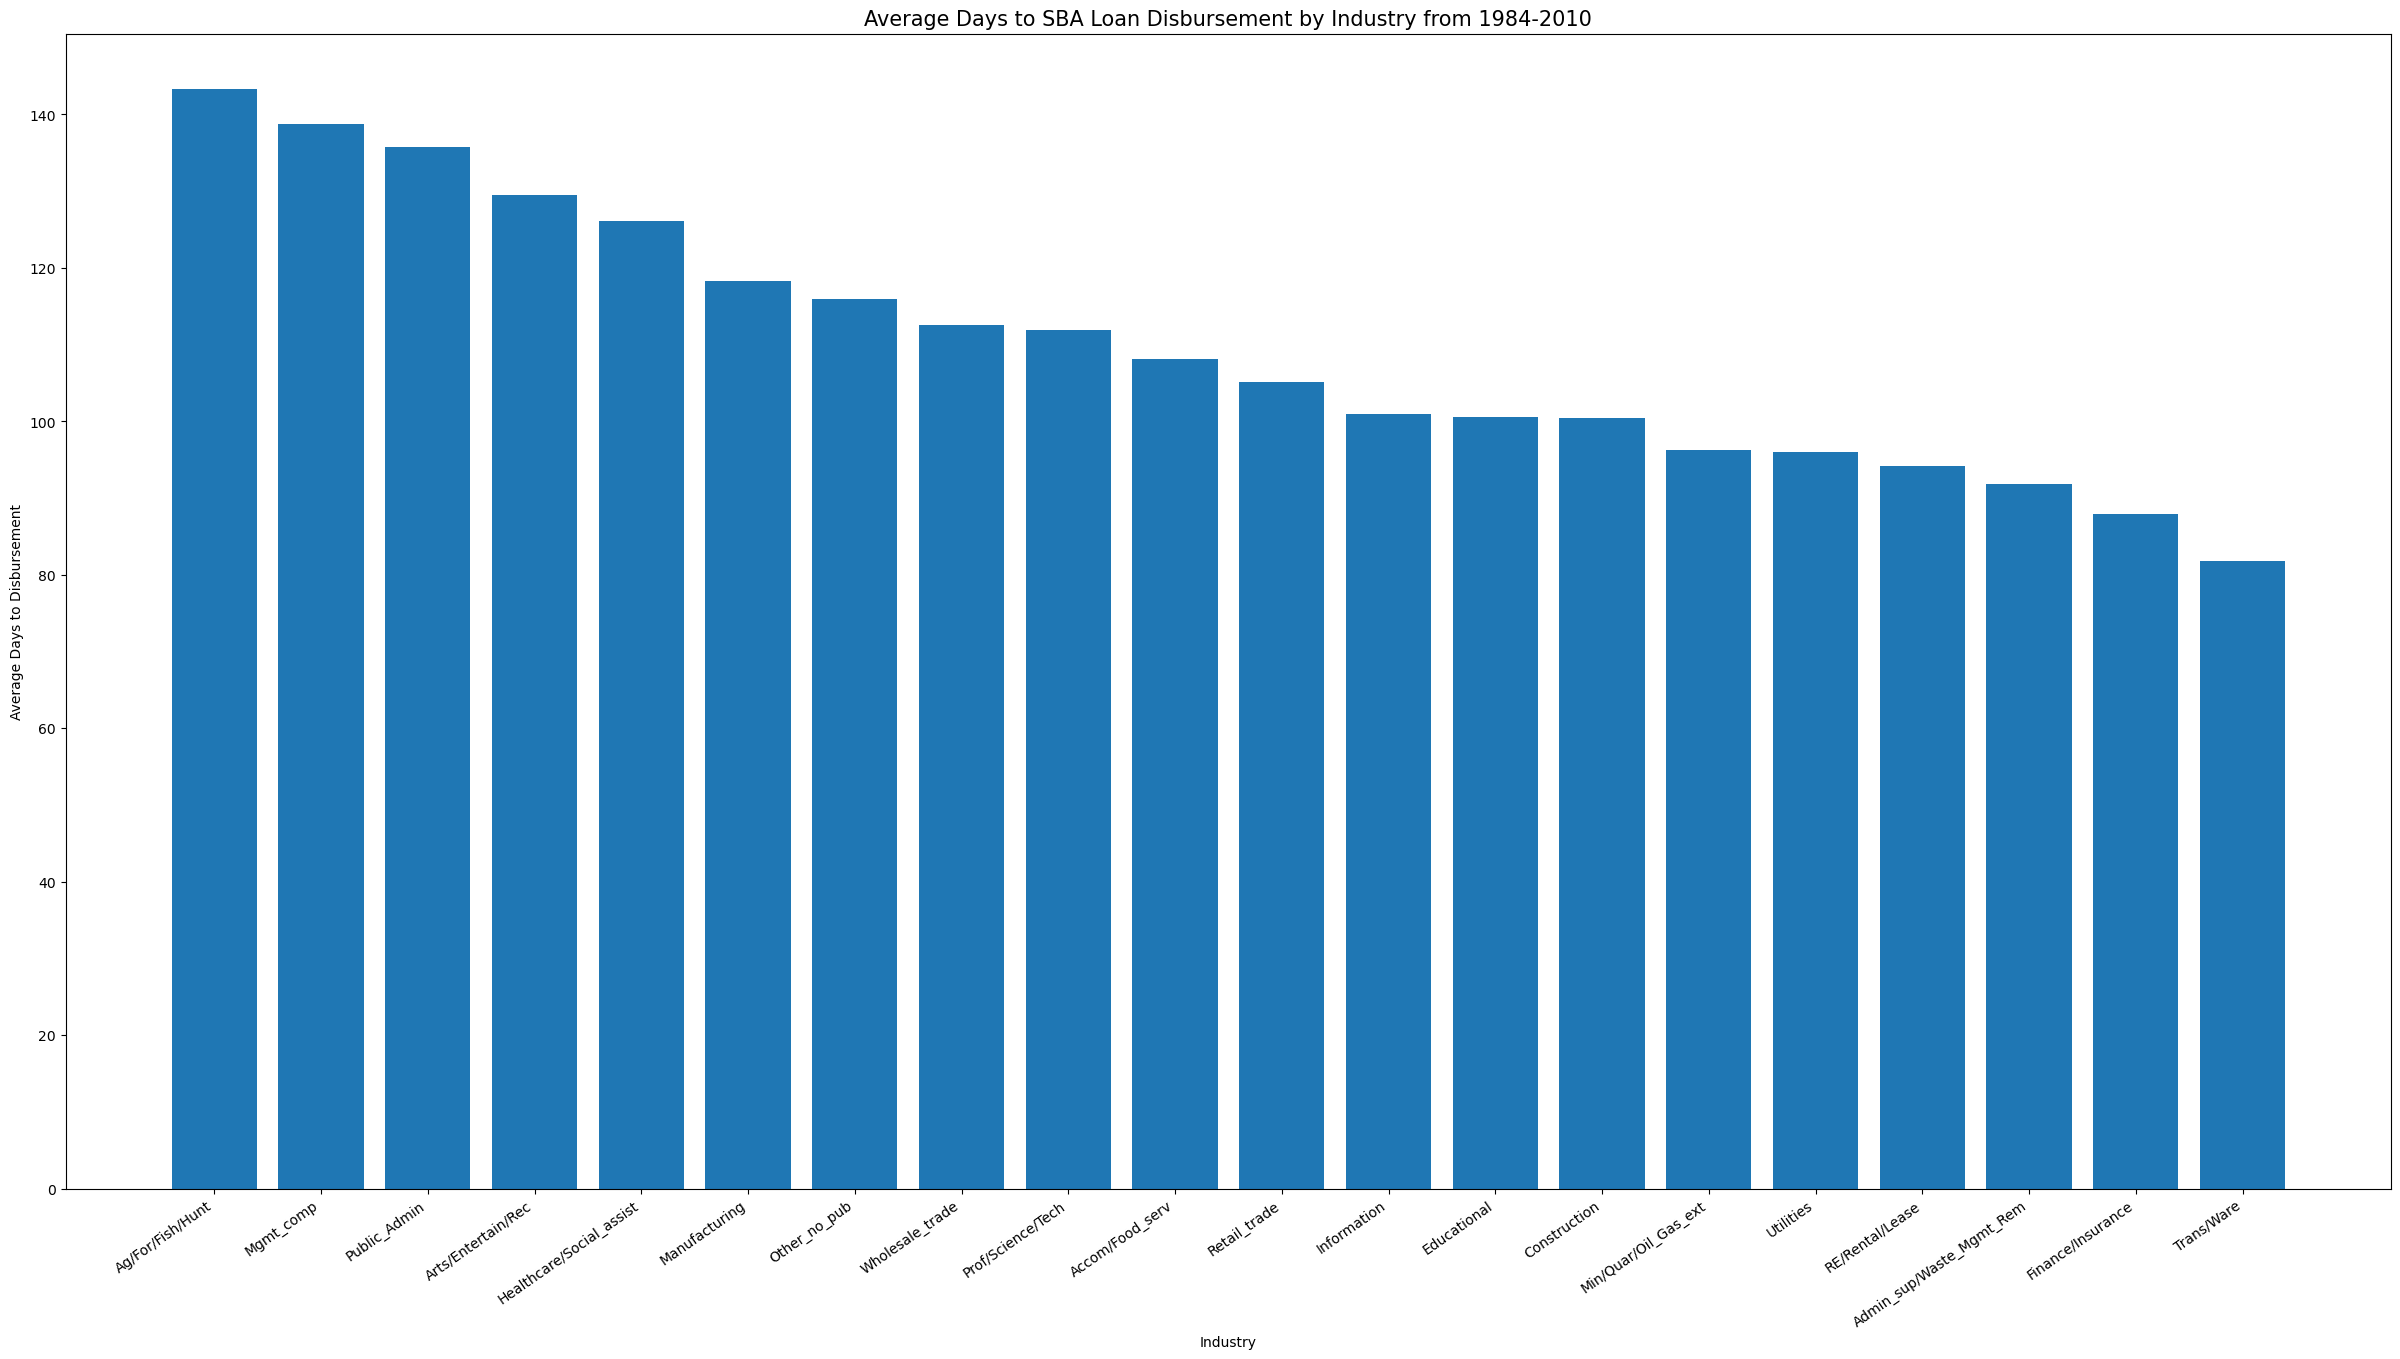

In [66]:
fig2, ax = plt.subplots(figsize = (30,15))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

Here, we notice that the industries with the highest avg loan amount also had the highest number of days to disbursement of funds.

Agri, Forestry, Fishing, Hunting ..

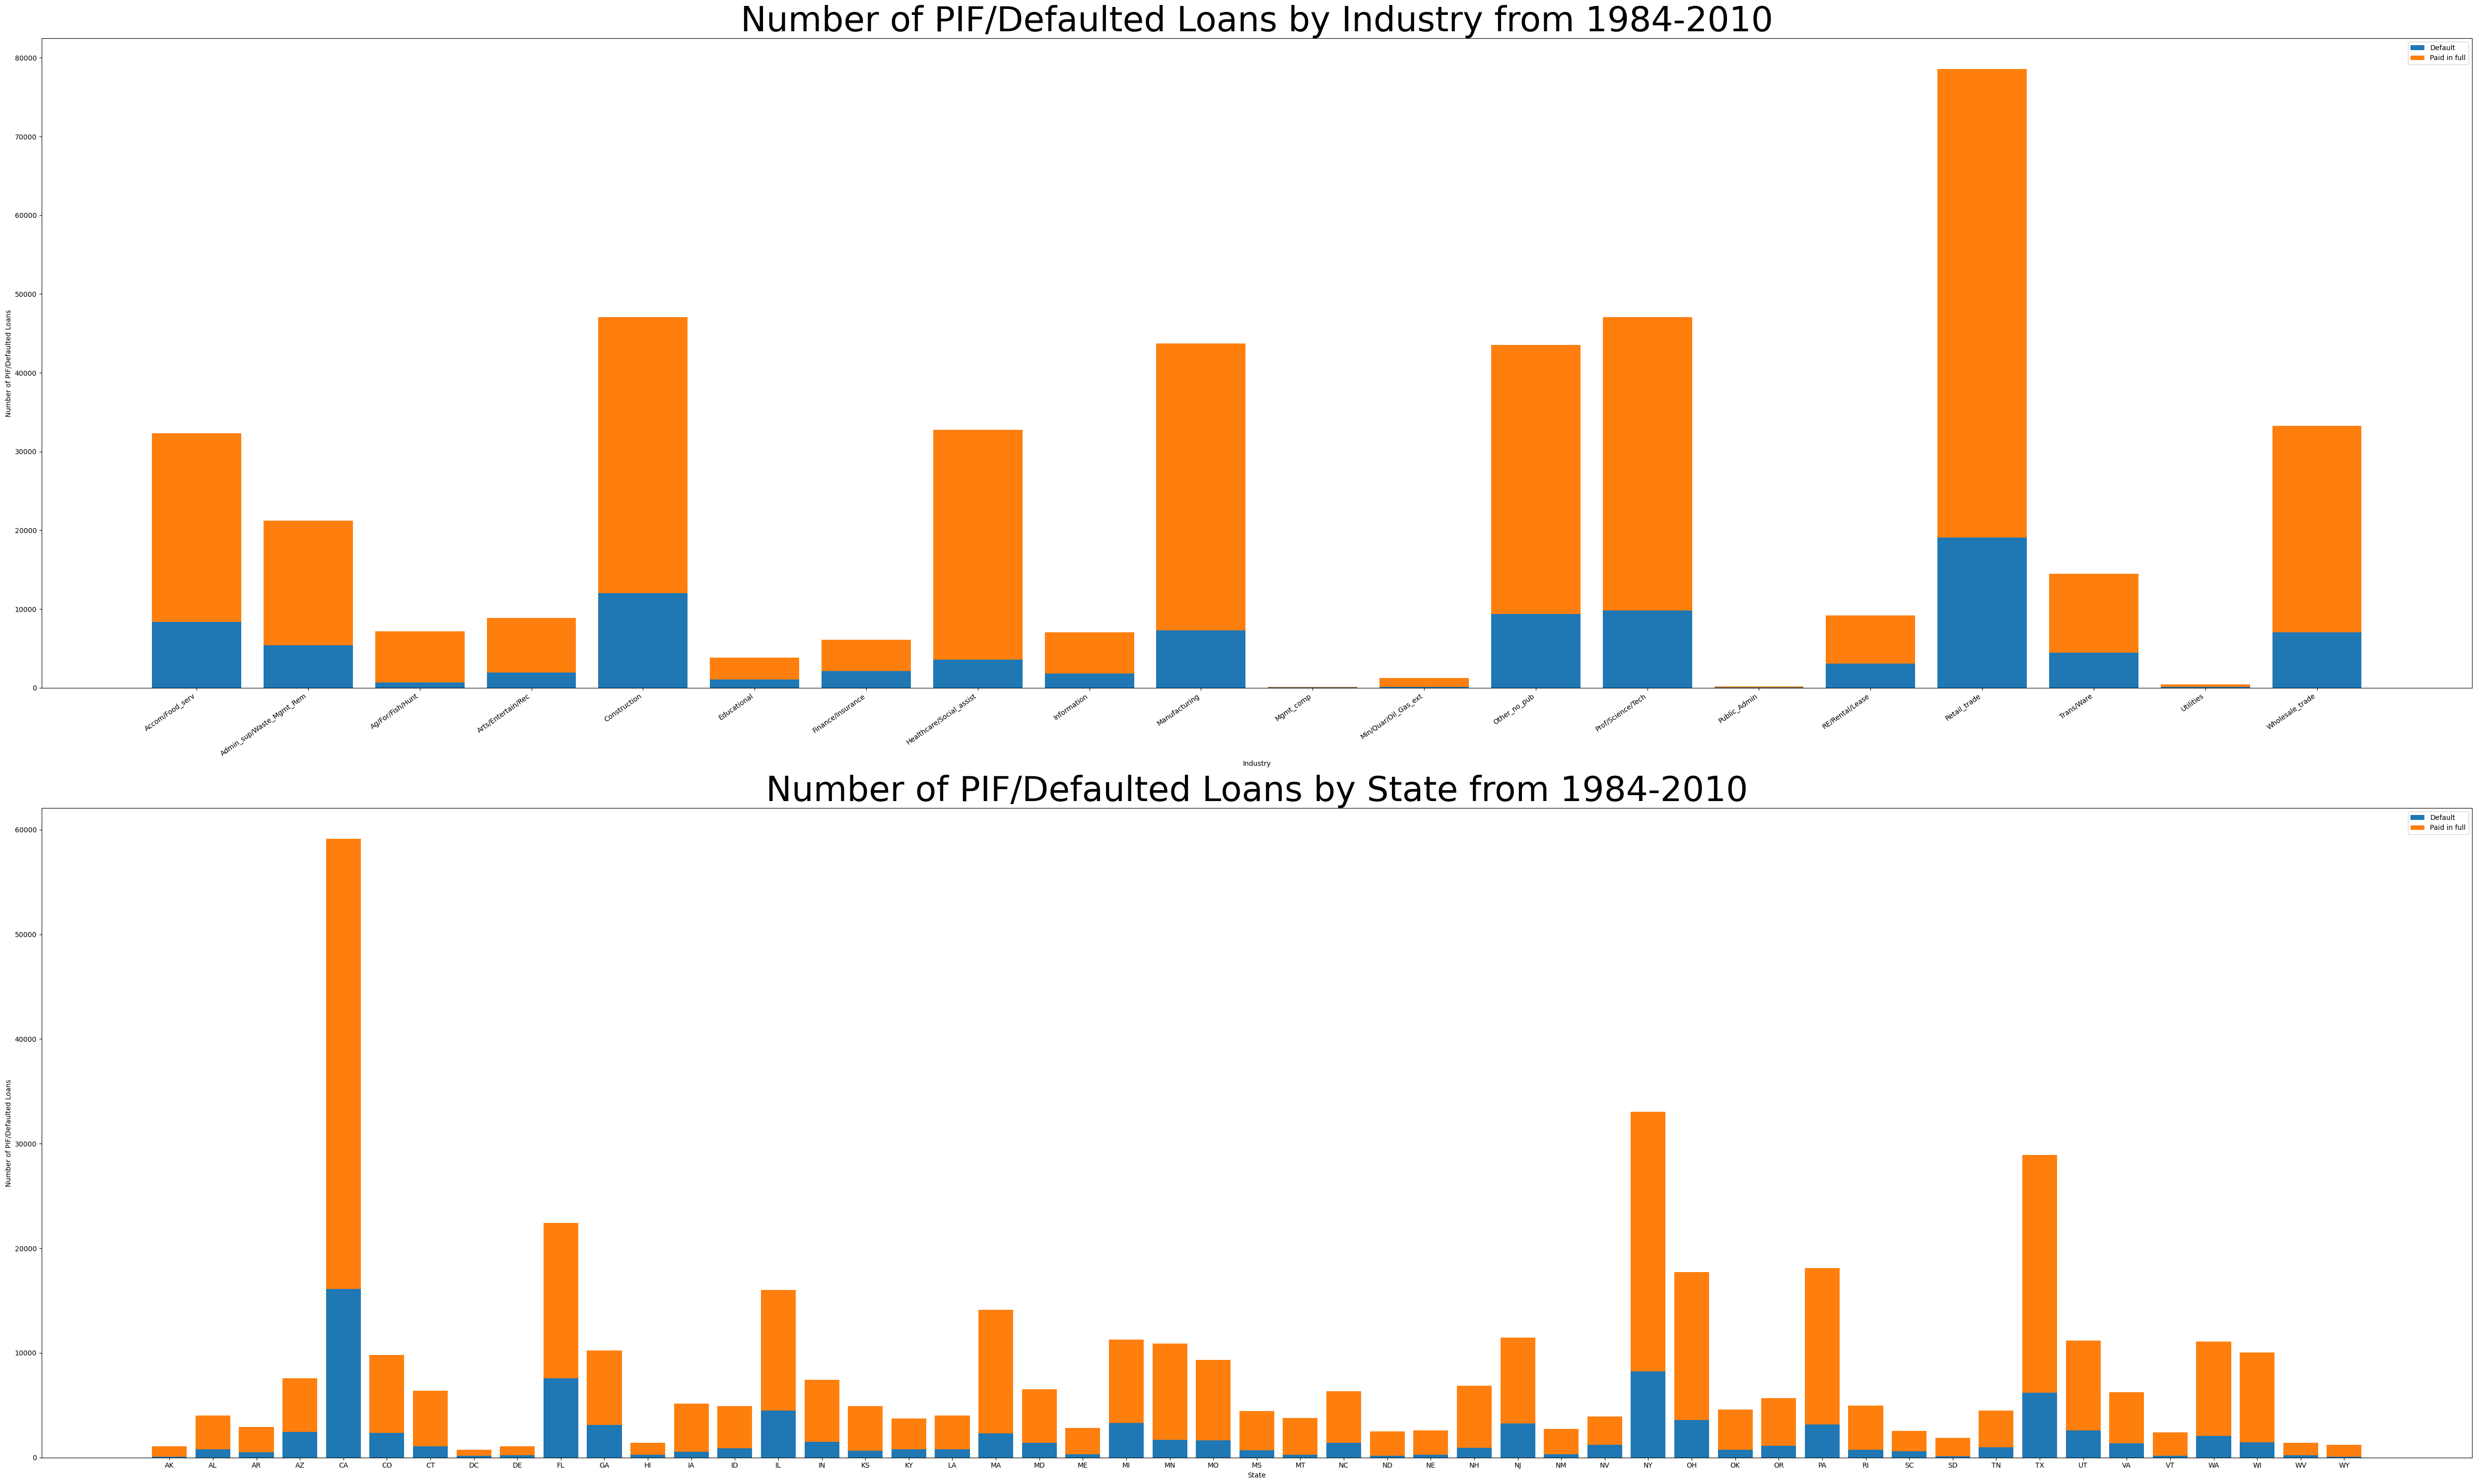

In [67]:
fig3 = plt.figure(figsize=(50, 30))

ax1a = plt.subplot(2,1,1)
ax2a = plt.subplot(2,1,2)

def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=50)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize= 50)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [68]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])

def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,23936,8381,0.259337
Admin_sup/Waste_Mgmt_Rem,15774,5427,0.255978
Ag/For/Fish/Hunt,6536,657,0.091339
Arts/Entertain/Rec,6976,1917,0.215563
Construction,34999,12048,0.256084
Educational,2750,1070,0.280105
Finance/Insurance,3984,2093,0.344413
Healthcare/Social_assist,29192,3571,0.108995
Information,5222,1830,0.259501


In [69]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])

def_state

Default,0,1,Def_Percent
State,,,
AK,979,94,0.087605
AL,3192,805,0.201401
AR,2414,528,0.179470
AZ,5119,2473,0.325738
CA,42983,16138,0.272966
CO,7439,2349,0.239988
CT,5328,1064,0.166458
DC,567,157,0.216851
DE,841,246,0.226311


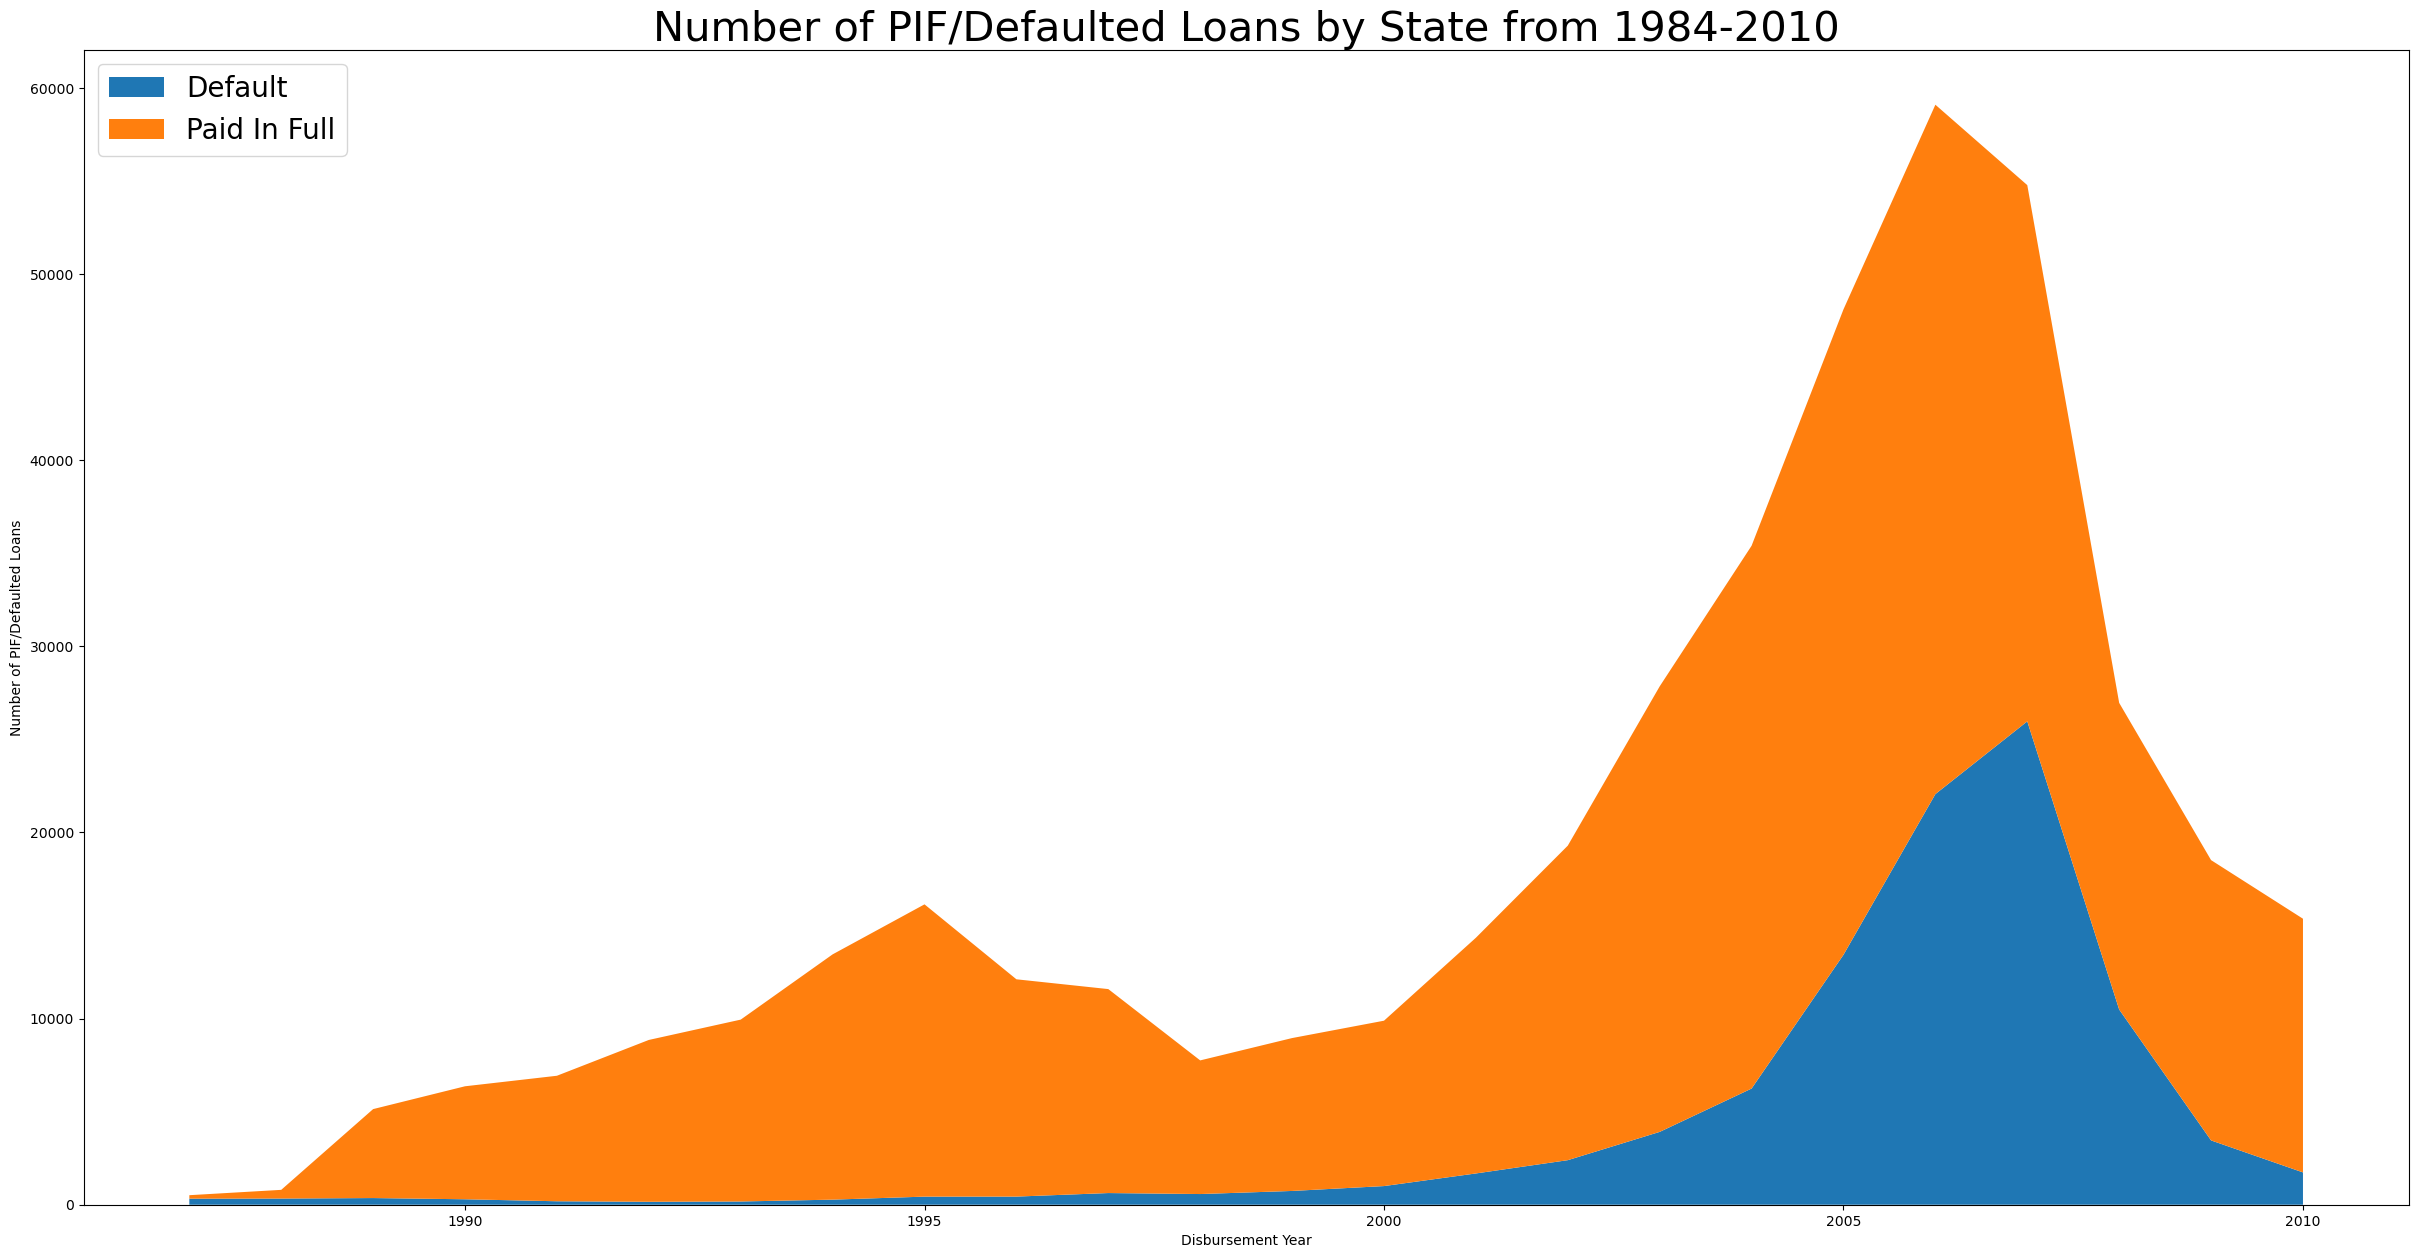

In [70]:
fig4, ax4 = plt.subplots(figsize = (30,15))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')

x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels = ['Default', 'Paid In Full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize = 30)

ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left', fontsize = 20)

plt.show()

## Model Training and Testing

Here, the plan is to one hot encode the dataframe, Normalise the dataframe by scaling it and spliting the dataset into training and testing dataframes, and train the model on the training dataset and test it on the testing and comparing the prediction and the testing target column using various metrics to find out the best possible model for the dataset.

The Classifier Models to be used are:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Naive Bayes
- Voting Classifier


In [71]:
df = pd.get_dummies(df)

df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
y = df['Default']
X = df.drop('Default', axis = 1)

In [73]:
scale = StandardScaler()
X_scld = scale.fit_transform(X)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_scld, y, test_size=0.25)

#### Logistic Regression

In [75]:
from sklearn.metrics import classification_report

In [76]:
lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.895     0.952     0.923     85193
           1      0.784     0.610     0.686     24330

    accuracy                          0.876    109523
   macro avg      0.839     0.781     0.804    109523
weighted avg      0.870     0.876     0.870    109523



#### Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtc = DecisionTreeClassifier(random_state = 42)
model_dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.958     0.957     0.957     85193
           1      0.849     0.852     0.851     24330

    accuracy                          0.934    109523
   macro avg      0.904     0.905     0.904    109523
weighted avg      0.934     0.934     0.934    109523



In [79]:
print("Testing accuracy is:",accuracy_score(y_val, y_pred))

Testing accuracy is: 0.9336303790071492


#### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.952     0.980     0.966     85193
           1      0.921     0.826     0.871     24330

    accuracy                          0.946    109523
   macro avg      0.937     0.903     0.918    109523
weighted avg      0.945     0.946     0.945    109523



In [82]:
print("Testing accuracy is:",accuracy_score(y_val, y_pred))

Testing accuracy is: 0.9457191640112123


#### Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.920     0.487     0.637     85193
           1      0.322     0.852     0.467     24330

    accuracy                          0.568    109523
   macro avg      0.621     0.669     0.552    109523
weighted avg      0.787     0.568     0.599    109523



In [85]:
print("Testing Accuracy is: ", accuracy_score(y_val, y_pred))

Testing Accuracy is:  0.5677894140956694


This accuracy value might be because of the factor of co-dependancy of columns on each other.

#### Voting Classifier

In [86]:
from sklearn.ensemble import VotingClassifier

In [87]:
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression()

pipe = VotingClassifier([('dtc', dtc),('rfc', rfc),('lr', lr)], weights = [4,5,1])

In [88]:
pipe.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                             ('rfc', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression())],
                 weights=[4, 5, 1])

In [89]:
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.946     0.982     0.964     85193
           1      0.929     0.804     0.862     24330

    accuracy                          0.943    109523
   macro avg      0.937     0.893     0.913    109523
weighted avg      0.942     0.943     0.941    109523



In [90]:
print("Testing Accuracy is: ", accuracy_score(y_val, y_pred))

Testing Accuracy is:  0.9427426202715411


In conclusion, we get the best result from the Random Forest Classifier with an accuracy score of 94.6 on the testing dataframe.

With this project, I got to learn about the Loan Approval Process for Small Business Administration (SBA), as well about the entire process from taking the loan to disbursement of it, based on the different sectors of business. Also understood the effect of Great Recession on the Disbursement of the loans during that period, and it's effect on taking loans.